In [72]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import geopy

#API keys
import api_keys

## Calculation of distance between two sets of coordinates

https://www.movable-type.co.uk/scripts/latlong.html

In [73]:
newport_ri = (41.5, -71.3)
cleveland_oh = (41.5, -81.7)
print(geopy.distance.distance(newport_ri, cleveland_oh).miles)

539.2482093692297


In [55]:
def geo_dist(lat1,lon1,lat2,lon2):
    R = 6371   #Earth's radius is km
    
    lat1 = float(lat1)
    lat2 = float(lat2)
    lon1 = float(lon1)
    lon2 = float(lon2)
    
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    del_phi = np.radians(lat2-lat1)
    del_lam = np.radians(lon2-lon1)
    
    a = np.sin(del_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(del_lam/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    d = R * c
    return(d / 1.6)

In [142]:
bar = geo_dist(45,'120',45,'120.5')

In [143]:
bar

24.570800599498956

In [44]:
lat1 = 45
lon1 = 120

lat2 = 45.35
lon2 = 120

R = 6371   #Earth's radius is km

In [45]:
phi1 = np.radians(lat1)
phi2 = np.radians(lat2)
del_phi = np.radians(lat2-lat1)
del_lam = np.radians(lon2-lon1)

In [46]:
a = np.sin(del_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(del_lam/2)**2

c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

d = R * c

d / 1.6

24.32389020349732

In [47]:
zip_coord_data = pd.read_csv('data/zip_coord.csv')
life_exp_data = pd.read_csv('data/US_A.csv')

In [48]:
ca_zips = zip_coord_data[(zip_coord_data['Zip'] <= 96100) & (zip_coord_data['Zip'] >= 90000)]
ca_zips

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
58,92232,Calexico,CA,33.026203,-115.284581,-8,1,"33.026203,-115.284581"
59,93227,Goshen,CA,36.357151,-119.425371,-8,1,"36.357151,-119.425371"
60,93234,Huron,CA,36.209815,-120.084700,-8,1,"36.209815,-120.0847"
61,93529,June Lake,CA,37.765218,-119.077690,-8,1,"37.765218,-119.07769"
62,93761,Fresno,CA,36.746375,-119.639658,-8,1,"36.746375,-119.639658"
...,...,...,...,...,...,...,...,...
43135,92702,Santa Ana,CA,33.640302,-117.769442,-8,1,"33.640302,-117.769442"
43136,92834,Fullerton,CA,33.640302,-117.769442,-8,1,"33.640302,-117.769442"
43137,93440,Los Alamos,CA,34.754650,-120.270320,-8,1,"34.75465,-120.27032"
43139,95987,Williams,CA,39.139543,-122.205630,-8,1,"39.139543,-122.20563"


In [64]:
ca_zips.columns

Index(['Zip', 'City', 'State', 'Latitude', 'Longitude', 'Timezone',
       'Daylight savings time flag', 'geopoint'],
      dtype='object')

In [73]:
print(type(foo))

<class 'pandas.core.frame.DataFrame'>


In [105]:
ca_zips.head(1)

,Zip,City,State,Latitude,Longitude
58,92232,Calexico,CA,33.026203,-115.284581


In [145]:
foo = ca_zips.head(1)
for content in ca_zips.head(10).itertuples(index=False):
    #print(content)
    foobar = pd.DataFrame([content])
    if float(foobar['Latitude']) >= 36:
        print(foobar)
    #for row in foo.itertuples():
     #   if 
      #  foo = foo.append(pd.DataFrame([content]))
    
foo

     Zip    City State   Latitude   Longitude
0  93227  Goshen    CA  36.357151 -119.425371
     Zip   City State   Latitude  Longitude
0  93234  Huron    CA  36.209815  -120.0847
     Zip       City State   Latitude  Longitude
0  93529  June Lake    CA  37.765218 -119.07769
     Zip    City State   Latitude   Longitude
0  93761  Fresno    CA  36.746375 -119.639658
     Zip    City State   Latitude  Longitude
0  94931  Cotati    CA  38.328614 -122.71044
     Zip     City State   Latitude  Longitude
0  95322  Gustine    CA  37.187494 -121.03232


,Zip,City,State,Latitude,Longitude
58,92232,Calexico,CA,33.026203,-115.284581


In [13]:
qaz = pd.read_json('ca_boundaries_geojson.json', orient='columns')
qaz

,type,geometries
0,GeometryCollection,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."


In [22]:
with open('ca_boundaries_geojson.json', 'r') as j:
    json_data = json.load(j)
    

In [108]:
json_df = pd.DataFrame(json_data['geometries'][0]['coordinates'][0][0], columns=['Longitude','Latitude'])
json_df.sort_values(by='Longitude')

,Longitude,Latitude
7245,-124.482003,40.440318
7244,-124.481367,40.435763
7243,-124.480543,40.428493
7246,-124.479158,40.452636
7242,-124.478625,40.422102
...,...,...
1676,-114.131078,34.260972
1672,-114.130947,34.262689
1675,-114.130852,34.261342
1674,-114.130799,34.261662


In [67]:
#json_df.iloc[1,0]
geo_dist(45,120,45.3,120.25)

24.18310563887223

In [119]:
origin = geopy.Point(45, 120)
destination = geopy.distance.geodesic(miles=25).destination(origin, 270)
destination

Point(44.99886006015614, 119.48973134934764, 0.0)

In [130]:
#Longitude Range: -126 to -113.5
#Latitude Range: 42.5 to 32

ca_range_coords = [[-126,42.5]]
search_radius = 25

while ca_range_coords[-1][0] < -113.5:
    origin = geopy.Point(ca_range_coords[-1][1], ca_range_coords[-1][0])
    coord_dist = geopy.distance.geodesic(miles=search_radius).destination(origin, 90)
    ca_range_coords.append([coord_dist[1],coord_dist[0]])
    
while ca_range_coords[-1][1] > 32:

    origin = geopy.Point(ca_range_coords[-1][1], ca_range_coords[-1][0])
    coord_dist = geopy.distance.geodesic(miles=search_radius).destination(origin, 150)
    ca_range_coords.append([coord_dist[1],coord_dist[0]])
    
    while ca_range_coords[-1][0] >= -126:
        origin = geopy.Point(ca_range_coords[-1][1], ca_range_coords[-1][0])
        coord_dist = geopy.distance.geodesic(miles=search_radius).destination(origin, 270)
        ca_range_coords.append([coord_dist[1],coord_dist[0]])
    
    origin = geopy.Point(ca_range_coords[-1][1], ca_range_coords[-1][0])
    coord_dist = geopy.distance.geodesic(miles=search_radius).destination(origin, 150)
    ca_range_coords.append([coord_dist[1],coord_dist[0]])
    
    while ca_range_coords[-1][0] < -113.5:
        origin = geopy.Point(ca_range_coords[-1][1], ca_range_coords[-1][0])
        coord_dist = geopy.distance.geodesic(miles=search_radius).destination(origin, 90)
        ca_range_coords.append([coord_dist[1],coord_dist[0]])
            


In [117]:
ca_range_coords[1][1]

42.86218253864918

In [131]:
ca_range_coords_df = pd.DataFrame(ca_range_coords, columns=('Longitude','Latitude'))

In [132]:
ca_range_coords_df

,Longitude,Latitude
0,-126.000000,42.500000
1,-125.510540,42.498955
2,-125.021088,42.497910
3,-124.531644,42.496865
4,-124.042208,42.495820
...,...,...
972,-114.983729,31.635589
973,-114.559617,31.634885
974,-114.135507,31.634181
975,-113.711402,31.633476


In [ ]:
base_url = 'http://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/reverseGeocode'

ca_search_coords = []

for i in range(ca_range_coords_df.shape[0]):
    df_lat = ca_range_coords_df.loc[i,'Latitude']
    df_lon = ca_range_coords_df.loc[i,'Longitude']
    
    params = {
        'f': "pjson",
        'featureTypes': "",
        'location': "{0},{1}".format(df_lon,df_lat)
    }
    
    try:
        if requests.get(base_url, params=params).json()['address']['Region'] == 'California':
            ca_search_coords.append([df_lon,df_lat])
            print(ca_search_coords[-1])
    except:
        next
    
    print(i)
    
print(len(ca_search_coords))

In [148]:
ca_search_coords_df = pd.DataFrame(ca_search_coords, columns=('Longitude','Latitude'))

In [150]:
ca_search_coords_df.to_csv(path_or_buf='ca_search_coords.csv', index=False)

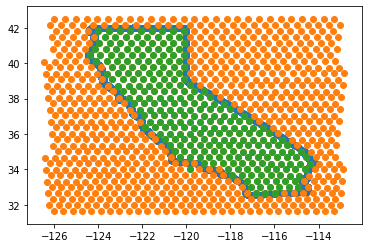

In [149]:
plt.scatter(json_df['Longitude'],json_df['Latitude'])
plt.scatter(ca_range_coords_df['Longitude'],ca_range_coords_df['Latitude'])
plt.scatter(ca_search_coords_df['Longitude'],ca_search_coords_df['Latitude'])

In [50]:
print(json_data['geometries'][0]['coordinates'][0][0])

[[-124.3288351, 41.998334], [-124.2170965, 41.998598], [-124.2118337, 41.9985359], [-124.2114593, 41.9985315], [-124.2111066, 41.9985261], [-124.2098505, 41.9985092], [-124.2083738, 41.998487], [-124.2082755, 41.9984855], [-124.2081314, 41.9984833], [-124.2046129, 41.9984303], [-124.2021534, 41.9983933], [-124.182652, 41.9981812], [-124.1729254, 41.9980967], [-124.13473, 41.9973432], [-124.1153133, 41.9971785], [-124.1035894, 41.9972132], [-124.0766217, 41.9969732], [-124.0446836, 41.9967651], [-124.012741, 41.9963633], [-123.9932792, 41.9961638], [-123.8378685, 41.996103], [-123.821472, 41.995473], [-123.8046018, 41.9955575], [-123.8043342, 41.9955589], [-123.7941414, 41.9956097], [-123.7884533, 41.9956381], [-123.7769893, 41.9958946], [-123.7728664, 41.9959868], [-123.751182, 41.9965271], [-123.7511818, 41.9966668], [-123.7372235, 41.9968743], [-123.7280908, 41.9970588], [-123.7145491, 41.9966937], [-123.7000154, 41.9963381], [-123.6797734, 41.9958427], [-123.6570814, 41.9952274], [-

In [24]:
json_data

{'type': 'GeometryCollection',
 'geometries': [{'type': 'MultiPolygon',
   'coordinates': [[[[-124.3288351, 41.998334],
      [-124.2170965, 41.998598],
      [-124.2118337, 41.9985359],
      [-124.2114593, 41.9985315],
      [-124.2111066, 41.9985261],
      [-124.2098505, 41.9985092],
      [-124.2083738, 41.998487],
      [-124.2082755, 41.9984855],
      [-124.2081314, 41.9984833],
      [-124.2046129, 41.9984303],
      [-124.2021534, 41.9983933],
      [-124.182652, 41.9981812],
      [-124.1729254, 41.9980967],
      [-124.13473, 41.9973432],
      [-124.1153133, 41.9971785],
      [-124.1035894, 41.9972132],
      [-124.0766217, 41.9969732],
      [-124.0446836, 41.9967651],
      [-124.012741, 41.9963633],
      [-123.9932792, 41.9961638],
      [-123.8378685, 41.996103],
      [-123.821472, 41.995473],
      [-123.8046018, 41.9955575],
      [-123.8043342, 41.9955589],
      [-123.7941414, 41.9956097],
      [-123.7884533, 41.9956381],
      [-123.7769893, 41.9958946],
     